<a href="https://colab.research.google.com/github/rhudaina/UPB-Graduate-Bootcamp-2024/blob/main/Activity3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Consider $n\times n$ random matrix. Compare runtimes for solving $$Ax = y$$ using LU, QR, `eig`, SVD, `np.linalg.inv`, `np.linalg.solve`, `np.linalg.pinv` for $n=2,2^2,2^3,\ldots,2^{11}$. Which is the fastest?

In [11]:
k = 10
size = [2**(i+1) for i in range(k)]
print(size)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [17]:
import scipy as sp
import numpy as np
from scipy.linalg import solve_triangular

def solve_lu(A, y):
  ''' solves Ax = y using LU factorization '''
  P, L, U = sp.linalg.lu(A)
  z = solve_triangular(L, P.T @ y, lower=True)
  x = solve_triangular(U, z, lower=False)
  return x

def solve_qr(A, y):
  ''' solves least squares problem ||Ax - y|| using QR factorization '''
  Q, R = sp.linalg.qr(A, mode='economic')
  z = Q.T @ y
  x = solve_triangular(R, z, lower=False)
  return x

def solve_eig(A, y):
  ''' solves Ax = y using eigenvalue decomposition with eig '''
  Lam, U = sp.linalg.eigh(A)
  x = U @ np.diag(1/Lam) @ U.T @ y
  return x

def solve_svd(A, y):
  ''' solves Ax = y using SVD '''
  U, S, Vh = sp.linalg.svd(A, full_matrices = False)
  x = Vh.T @ np.diag(1/S) @ U.T @ y
  return x

In [25]:
import time

time_lu = np.zeros(k)
time_qr = np.zeros(k)
time_eig = np.zeros(k)
time_svd = np.zeros(k)
time_inv = np.zeros(k)
time_solve = np.zeros(k)
time_pinv = np.zeros(k)

for i in range(k):
  n = 2**(i+1)
  A = np.random.randn(n,n)
  x = np.random.randn(n)
  y = A @ x

  t_start = time.time()
  x = solve_lu(A,y)
  t_end = time.time()
  time_lu[i] = t_end - t_start

  t_start = time.time()
  x = solve_qr(A,y)
  t_end = time.time()
  time_qr[i] = t_end - t_start

  t_start = time.time()
  x = solve_eig(A,y)
  t_end = time.time()
  time_eig[i] = t_end - t_start

  t_start = time.time()
  x = solve_svd(A,y)
  t_end = time.time()
  time_svd[i] = t_end - t_start

  t_start = time.time()
  x = np.linalg.inv(A) @ y
  t_end = time.time()
  time_inv[i] = t_end - t_start

  t_start = time.time()
  x = np.linalg.solve(A, y)
  t_end = time.time()
  time_solve[i] = t_end - t_start

  t_start = time.time()
  x = np.linalg.pinv(A) @ y
  t_end = time.time()
  time_pinv[i] = t_end - t_start

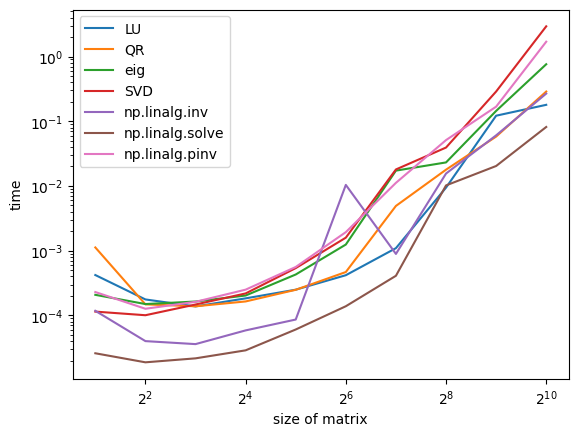

In [26]:
import matplotlib.pyplot as plt

plt.plot(size, time_lu, label ='LU')
plt.plot(size, time_qr, label ='QR')
plt.plot(size, time_eig, label ='eig')
plt.plot(size, time_svd, label ='SVD')
plt.plot(size, time_inv, label ='np.linalg.inv')
plt.plot(size, time_solve, label ='np.linalg.solve')
plt.plot(size, time_pinv, label ='np.linalg.pinv')

plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('size of matrix')
plt.ylabel('time')
plt.legend()
plt.show()

Source: [Brad Nelson (2021), Scientific Computing with Python](https://caam37830.github.io/book/index.html)